In [1]:
import glob
import os.path as osp
import numpy as np

rootpath = "/home/radiology_datas/JHU-radiology/20170509/"
path_CN = glob.glob(rootpath + "CN/*/fullsize*.pkl")
path_AD = glob.glob(rootpath + "AD/*/*.pkl")
path_EMCL = glob.glob(rootpath + "EMCI/*/*.pkl")
path_LMCL = glob.glob(rootpath + "LMCI/*/*.pkl")
path_SMC = glob.glob(rootpath + "SMC/*/*.pkl")

label_CN = 0
label_AD = 1
label_EMCL = 2
label_LMCL = 3
label_SMC = 4

print(path_CN[0])
print(len(path_CN))

/home/radiology_datas/JHU-radiology/20170509/CN/002_S_4213/fullsize_brain_flipRL_ADNI_002_S_4213_MR_MT1__N3m_Br_20110910135704514_S121168_I255409_MNI.pkl
146


In [2]:
import pickle

with open(path_CN[0], 'rb')as rf:
    image = pickle.load(rf, encoding='latin1')

#image

In [3]:
import glob
import os.path as osp
import random
import numpy as np
import json
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
from torch.utils.data import DataLoader
import torchvision
from torchvision import models, transforms
import matplotlib.pyplot as plt


In [4]:
class ImageTransform():
    def __init__(self):
        self.data_transform = transforms.Compose([
            transforms.ToTensor()
        ])
    
    def __call__(self, img):
        return self.data_transform(img)

In [5]:
class BrainDataset(data.Dataset):

    def __init__(self, file_list, label, transform=None):
        self.file_list = file_list
        self.label = label
        self.transform = transform

    def __len__(self):
        return len(self.file_list)

    def __getitem__(self, index):
        img_path = self.file_list[index]
        with open(img_path, 'rb') as rf:
            img = pickle.load(rf, encoding='latin1')

        img_transformed = self.transform(img)
        return img_transformed, self.label

    def __call__(self, index):
        return self.__getitem__(index)



In [6]:
from sklearn.model_selection import train_test_split

train_CN_path, val_CN_path = train_test_split(path_CN, test_size=0.3, shuffle=True)

train_CN = BrainDataset(file_list=train_CN_path, label=label_CN, transform=ImageTransform())
val_CN = BrainDataset(file_list=val_CN_path, label=label_CN, transform=ImageTransform())


size of the training dataset =  102
size of the test dataset =  44
training image size = torch.Size([160, 160, 192]), training label = 0
test image size = torch.Size([160, 160, 192]), test label = 0


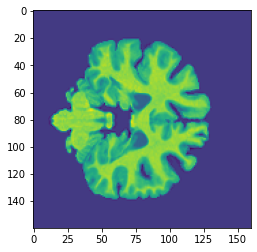

In [9]:
# check the datasets

print("size of the training dataset = ", len(train_CN))
print("size of the test dataset = ", len(val_CN))
print("training image size = {}, training label = {}".format(train_CN(0)[0].size(), train_CN(0)[1]))
print("test image size = {}, test label = {}".format(val_CN(0)[0].size(), val_CN(0)[1]))

idx = 0
image, label = train_CN(idx)
plt.imshow(np.flip(image.numpy().transpose(2,1,0)[80],0))